<center> <img src = https://raw.githubusercontent.com/AndreyRysistov/DatasetsForPandas/main/hh%20label.jpg alt="drawing" style="width:400px;">

# <center> Проект: Анализ вакансий из HeadHunter
   

In [1314]:
import pandas as pd
import psycopg2
import requests
from bs4 import BeautifulSoup
from collections import Counter
import matplotlib.pyplot as plt

In [1315]:
# вставьте сюда параметры подключения из юнита 1. Работа с базой данных из Python
connection = psycopg2.connect(

    dbname='project_sql',

    user='skillfactory',

    host='84.201.134.129',

    password='cCkxxLVrDE8EbvjueeMedPKt',

    port=5432

)

# Юнит 3. Предварительный анализ данных

1. Напишите запрос, который посчитает количество вакансий в нашей базе (вакансии находятся в таблице vacancies). 

In [1316]:
# текст запроса
query_3_1 = f'''
SELECT count(*)
FROM vacancies    
'''

In [1317]:
# результат запроса
vac_df = pd.read_sql_query(query_3_1, connection)
vac_df

D:\Temp\ipykernel_23264\3752011682.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_df = pd.read_sql_query(query_3_1, connection)


,count
0,49197


2. Напишите запрос, который посчитает количество работодателей (таблица employers). 

In [1318]:
# текст запроса
query_3_2 = f'''
SELECT distinct count(id) AS employers_count
FROM employers   
'''

In [1319]:
# результат запроса
emp_df = pd.read_sql_query(query_3_2, connection)
emp_df

D:\Temp\ipykernel_23264\719013263.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  emp_df = pd.read_sql_query(query_3_2, connection)


,employers_count
0,23501


3. Посчитате с помощью запроса количество регионов (таблица areas).

In [1320]:
# текст запроса
query_3_3 = f"""
SELECT distinct count(name) AS areas_count
FROM areas   
"""

In [1321]:
# результат запроса
area_df = pd.read_sql_query(query_3_3, connection)
area_df

D:\Temp\ipykernel_23264\879523715.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  area_df = pd.read_sql_query(query_3_3, connection)


,areas_count
0,1362


4. Посчитайте с помощью запроса количество сфер деятельности в базе (таблица industries).

In [1322]:
# текст запроса
query_3_4 = f"""
SELECT distinct count(id) AS industries_count
FROM industries   
            """

In [1323]:
# результат запроса
ind_df = pd.read_sql_query(query_3_4, connection)
ind_df

D:\Temp\ipykernel_23264\3199698201.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ind_df = pd.read_sql_query(query_3_4, connection)


,industries_count
0,294


***

In [1324]:
query_3_5 = f"""
SELECT 
    vac.id AS vacancy_id,
    vac.name AS vacancy_name,
    emp.id AS employer_id,
    emp.name AS employer_name,
    ar.id AS area_id,
    ar.name AS area_name
FROM vacancies vac
LEFT JOIN employers emp ON vac.employer_id = emp.id
LEFT JOIN areas ar ON vac.area_id = ar.id
"""
# результат запроса
vac_emp_area_df = pd.read_sql_query(query_3_5, connection)

# display(vac_emp_area_df.head(10))
# расчет количества уникальных записей в employer_id и area_id
unique_employers = vac_emp_area_df['employer_id'].nunique() 
unique_areas = vac_emp_area_df['area_id'].nunique()
print(f"Количество уникальных работодателей: {unique_employers}")
print(f"Количество уникальных регионов: {unique_areas}")

D:\Temp\ipykernel_23264\3598481701.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_emp_area_df = pd.read_sql_query(query_3_5, connection)


Количество уникальных работодателей: 14906
Количество уникальных регионов: 769


### *Выводы по предварительному анализу данных*

В исследуемой БД нам представлены данные в пяти таблицах:
1. vacancies - список вакансий (49197 вакансий от 14906 уникальных работодателей из 769 регионов)
2. areas - справочник по регионам (всего 1362)
3. employers - справочник по работодателям (всего 23501)
4. industries - справочник вариантов сфер деятельности работодателей (всего 294)
5. employers_industries - дополнительный справочник



# Юнит 4. Детальный анализ вакансий

1. Напишите запрос, который позволит узнать, сколько (cnt) вакансий в каждом регионе (area).
Отсортируйте по количеству вакансий в порядке убывания.

In [1325]:
# текст запроса
query_4_1 = f"""
SELECT
    area.name,
    count(v.id) AS cnt
FROM areas AS area
    LEFT JOIN vacancies AS v ON area.id = v.area_id
GROUP BY area.name
ORDER BY cnt DESC
LIMIT 20   
"""

In [1326]:
# результат запроса
regions_df = pd.read_sql_query(query_4_1, connection)
regions_df

D:\Temp\ipykernel_23264\359069637.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  regions_df = pd.read_sql_query(query_4_1, connection)


,name,cnt
0,Москва,5333
1,Санкт-Петербург,2851
2,Минск,2112
3,Новосибирск,2006
4,Алматы,1892
5,Екатеринбург,1698
6,Нижний Новгород,1670
7,Казань,1415
8,Краснодар,1301
9,Самара,1144


2. Напишите запрос, чтобы определить у какого количества вакансий заполнено хотя бы одно из двух полей с зарплатой.

In [1327]:
# текст запроса
query_4_2 = f"""
SELECT                
    COUNT(v.id) AS salary_cnt
FROM vacancies AS v
WHERE v.salary_from IS NOT NULL OR v.salary_to IS NOT NULL
                        
"""            

In [1328]:
# результат запроса
sal_df = pd.read_sql_query(query_4_2, connection)
sal_df

D:\Temp\ipykernel_23264\2994334641.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sal_df = pd.read_sql_query(query_4_2, connection)


,salary_cnt
0,24073


3. Найдите средние значения для нижней и верхней границы зарплатной вилки. Округлите значения до целого.

In [1329]:
# текст запроса
query_4_3 = f"""
SELECT                
    AVG(v.salary_from) AS avg_salary_from,
    AVG(v.salary_to) AS avg_salary_to
FROM vacancies AS v              
"""

In [1330]:
# результат запроса
avg_sal_df = pd.read_sql_query(query_4_3, connection)
# округляем значения avg_salary_from & avg_salary_to до целых
avg_sal_df['avg_salary_from'] = avg_sal_df['avg_salary_from'].round(0)
avg_sal_df['avg_salary_to'] = avg_sal_df['avg_salary_to'].round(0)
avg_sal_df

D:\Temp\ipykernel_23264\3651007603.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_sal_df = pd.read_sql_query(query_4_3, connection)


,avg_salary_from,avg_salary_to
0,71065.0,110537.0


4. Напишите запрос, который выведет количество вакансий для каждого сочетания типа рабочего графика (schedule) и типа трудоустройства (employment), используемого в вакансиях. Результат отсортируйте по убыванию количества.


In [1331]:
# текст запроса
query_4_4 = f"""
SELECT              
    v.schedule,
    v.employment,
    COUNT(v.id) AS cnt
FROM vacancies AS v 
GROUP BY v.schedule, v.employment
ORDER by cnt desc                
--OFFSET 1
--LIMIT 1
                             
"""

In [1332]:
# результат запроса
sh_emp_df = pd.read_sql_query(query_4_4, connection)
sh_emp_df

D:\Temp\ipykernel_23264\2205611185.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sh_emp_df = pd.read_sql_query(query_4_4, connection)


,schedule,employment,cnt
0,Полный день,Полная занятость,35367
1,Удаленная работа,Полная занятость,7802
2,Гибкий график,Полная занятость,1593
3,Удаленная работа,Частичная занятость,1312
4,Сменный график,Полная занятость,940
5,Полный день,Стажировка,569
6,Вахтовый метод,Полная занятость,367
7,Полный день,Частичная занятость,347
8,Гибкий график,Частичная занятость,312
9,Полный день,Проектная работа,141


5. Напишите запрос, выводящий значения поля Требуемый опыт работы (experience) в порядке возрастания количества вакансий, в которых указан данный вариант опыта. 

In [1333]:
# текст запроса
query_4_5 = f"""
SELECT             
    v.experience,
    COUNT(v.id) AS cnt
FROM vacancies AS v 
GROUP BY v.experience
ORDER by cnt                                                       
"""

In [1334]:
# результат запроса
expiriece_df = pd.read_sql_query(query_4_5, connection)
# Добавляем стобец percentage, который показывает процент от общего количества вакансий
expiriece_df['percentage'] = (expiriece_df['cnt'] / vac_df.iloc[0, 0]) * 100
expiriece_df['percentage'] = expiriece_df['percentage'].round(2)
expiriece_df

D:\Temp\ipykernel_23264\1651652980.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  expiriece_df = pd.read_sql_query(query_4_5, connection)


,experience,cnt,percentage
0,Более 6 лет,1337,2.72
1,Нет опыта,7197,14.63
2,От 3 до 6 лет,14511,29.50
3,От 1 года до 3 лет,26152,53.16


***

In [1335]:
query_4_sal = f"""
SELECT *
FROM vacancies AS v
"""
# результат запроса
vac_sal_df = pd.read_sql_query(query_4_sal, connection)
# расчитать процентиль 25, 50, 75 для salary_from и salary_to
percentiles = vac_sal_df[['salary_from', 'salary_to']].quantile([0.25, 0.5, 0.75])
# округляем значения до целых
percentiles = percentiles.round(0)
# переименовываем индексы
percentiles.index = ['25%', '50%', '75%']
# выводим результат
print("Процентиль 25, 50, 75 для salary_from и salary_to:")
print(percentiles)

# подсчёт процента вакансий в которых не указана зарплата salary_from и salary_to
vac_sal_df['no_salary'] = vac_sal_df['salary_from'].isnull() & vac_sal_df['salary_to'].isnull()
no_salary_count = vac_sal_df['no_salary'].sum()
total_vacancies = vac_sal_df.shape[0]
no_salary_percentage = (no_salary_count / total_vacancies) * 100
print(f"Процент вакансий, в которых не указана зарплата: {no_salary_percentage:.2f}%")



D:\Temp\ipykernel_23264\2231400768.py:6: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_sal_df = pd.read_sql_query(query_4_sal, connection)


Процентиль 25, 50, 75 для salary_from и salary_to:
     salary_from  salary_to
25%      35000.0    50000.0
50%      50000.0    80000.0
75%      90000.0   150000.0
Процент вакансий, в которых не указана зарплата: 51.07%


### *Выводы по детальному анализу вакансий*

1. *В ТОП-20 городов по количеству предлагаемых вакансий представлены в основном города милионники, столицы государств или города численность которых приближается к отметке в 1 000 000 жителей.*
2. *К сожалению далеко не все работодатели указывают уровень желаемой зарплаты, всего в данном кейсе из 49197 вакансий в 24073 случаях указан хоть один из уровней З/П, что составляет чуть менее 50%.*
3. *Средние уровнии заплат для вакансий, где указана хотя бы одна из границ, **salary_from и salary_to - 71065.0	110537.0 ₽** соответственно, в то время как половина вилок предлагаемых З/П находится в пределах *35000.0 - 50000.0* и *90000.0 - 150000.0* ₽.* 
4. *Наибольший интерес для работодателей предсталяют кандидаты с полной занятостью среди которых лидируют те, кто готов трудиться полный день.* 
5. *В половине случаев (53.16%) работодатели ищут специалистов с минимальным опытом работы 1 - 3 года*

# Юнит 5. Анализ работодателей

1. Напишите запрос, который позволит узнать, какие работодатели находятся на первом и пятом месте по количеству вакансий.

In [1336]:
# текст запроса
query_5_1 = f"""
SELECT             
    e.name AS employer_name,
    e.id AS employer_id,
    COUNT(v.employer_id) AS cnt
FROM employers AS e
    JOIN vacancies AS v ON e.id = v.employer_id
GROUP BY 
    e.name,
    e.id
ORDER by cnt DESC          
--LIMIT 30                                           
"""

In [1337]:
# результат запроса
employers_df = pd.read_sql_query(query_5_1, connection)
display(employers_df)
# Определяем топ-50 работодателей по количеству вакансий
top50_employers_df = employers_df.head(50)
# Сохраняем топ-50 работодателей в excel файл
# top50_employers_df.to_excel('top50_employers.xlsx', index=False)


D:\Temp\ipykernel_23264\345242690.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_df = pd.read_sql_query(query_5_1, connection)


,employer_name,employer_id,cnt
0,Яндекс,1740,1933
1,Ростелеком,2748,491
2,Тинькофф,78638,444
3,СБЕР,3529,428
4,Газпром нефть,39305,331
...,...,...,...
14901,Евсеев Сергей Владимирович,4868743,1
14902,Кадровые технологии,1620,1
14903,ЛОМБАРД 24,3253186,1
14904,Авто-Компонент ТД,592461,1


2. Напишите запрос, который для каждого региона выведет количество работодателей и вакансий в нём.
Среди регионов, в которых нет вакансий, найдите тот, в котором наибольшее количество работодателей.


In [1338]:
# текст запроса

query_5_2 = f"""
SELECT 
    area_employers.area_name,
    area_employers.employers_count,
    COUNT(v.id) AS vacancies_count
FROM (
SELECT
    area.name AS area_name,
    area.id AS area_id,
    COUNT(DISTINCT e.id) AS employers_count                     
FROM areas AS area
LEFT JOIN employers AS e ON e.area = area.id                
GROUP BY area_id, area.name) AS area_employers
                
LEFT JOIN vacancies AS v ON area_employers.area_id = v.area_id
GROUP BY area_employers.area_name, area_employers.employers_count
HAVING area_employers.employers_count > 0 and COUNT(v.id) = 0
ORDER BY area_employers.employers_count DESC                                                      
"""

In [1339]:
# результат запроса
no_employers_df = pd.read_sql_query(query_5_2, connection)
no_employers_df
# вывести первые 20 строк
no_employers_df.head(20)


D:\Temp\ipykernel_23264\3413355441.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  no_employers_df = pd.read_sql_query(query_5_2, connection)


,area_name,employers_count,vacancies_count
0,Россия,410,0
1,Казахстан,207,0
2,Московская область,75,0
3,Краснодарский край,19,0
4,Беларусь,18,0
5,Ростовская область,18,0
6,Азербайджан,17,0
7,Нижегородская область,16,0
8,Республика Татарстан,16,0
9,Узбекистан,15,0


3. Для каждого работодателя посчитайте количество регионов, в которых он публикует свои вакансии. Отсортируйте результат по убыванию количества.


In [1340]:
# текст запроса
query_5_3 = f"""
SELECT             
    emp.name AS employer_name,
    COUNT(DISTINCT vac.area_id) AS cnt
FROM vacancies AS vac 
    JOIN employers AS emp ON vac.employer_id = emp.id                   
GROUP BY emp.name
ORDER by cnt DESC          
                                            
"""

In [1341]:
# результат запроса
vac_area_df = pd.read_sql_query(query_5_3, connection)
vac_area_df.rename(columns={'cnt': 'vacancies_count'}, inplace=True)
vac_area_df.head(20)

D:\Temp\ipykernel_23264\60920242.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  vac_area_df = pd.read_sql_query(query_5_3, connection)


,employer_name,vacancies_count
0,Яндекс,181
1,Ростелеком,152
2,Спецремонт,116
3,Поляков Денис Иванович,88
4,ООО ЕФИН,71
5,Совкомбанк,63
6,МТС,55
7,"ЭФКО, Управляющая компания",49
8,Почта России,48
9,КРОН,48


4. Напишите запрос для подсчёта количества работодателей, у которых не указана сфера деятельности. 

In [1342]:
# текст запроса
query_5_4 = f"""
SELECT COUNT(DISTINCT emp.id) AS employers_without_cnt                     
FROM employers AS emp 
    LEFT JOIN employers_industries AS ei ON emp.id = ei.employer_id 
    LEFT JOIN industries AS ind ON ei.industry_id = ind.id 
WHERE ind.name IS NULL                                                                                    
"""

In [1343]:
# результат запроса
employers_industries_not_verify_df = pd.read_sql_query(query_5_4, connection)
employers_industries_not_verify_df

D:\Temp\ipykernel_23264\2446699455.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_industries_not_verify_df = pd.read_sql_query(query_5_4, connection)


,employers_without_cnt
0,8419


5. Напишите запрос, чтобы узнать название компании, находящейся на третьем месте в алфавитном списке (по названию) компаний, у которых указано четыре сферы деятельности. 

In [1344]:
# текст запроса
query_5_5 = f"""
SELECT            
    emp.name AS employer_name,
    COUNT(emp.id) AS cnt
FROM employers AS emp 
    LEFT JOIN employers_industries AS ei ON emp.id = ei.employer_id 
    LEFT JOIN industries AS ind ON ei.industry_id = ind.id 
WHERE ind.name IS NOT NULL 
GROUP BY emp.name 
HAVING COUNT(emp.id) = 4
ORDER BY emp.name
OFFSET 2
LIMIT 1                                                                                                         
"""

In [1345]:
# результат запроса
employers_industries_verify_df = pd.read_sql_query(query_5_5, connection)
employers_industries_verify_df

D:\Temp\ipykernel_23264\1535529697.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_industries_verify_df = pd.read_sql_query(query_5_5, connection)


,employer_name,cnt
0,2ГИС,4


6. С помощью запроса выясните, у какого количества работодателей в качестве сферы деятельности указана Разработка программного обеспечения.


In [1346]:
# текст запроса
query_5_6 = f"""
SELECT                     
    COUNT(ind.id) AS cnt
FROM employers AS emp 
    LEFT JOIN employers_industries AS ei ON emp.id = ei.employer_id 
    LEFT JOIN industries AS ind ON ei.industry_id = ind.id 
WHERE ind.name = 'Разработка программного обеспечения'                
"""

In [1347]:
# результат запроса
employers_software_dev_df = pd.read_sql_query(query_5_6, connection)

employers_software_dev_df 

D:\Temp\ipykernel_23264\549338585.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  employers_software_dev_df = pd.read_sql_query(query_5_6, connection)


,cnt
0,3553


7. Для компании «Яндекс» выведите список регионов-миллионников, в которых представлены вакансии компании, вместе с количеством вакансий в этих регионах. Также добавьте строку Total с общим количеством вакансий компании. Результат отсортируйте по возрастанию количества.

Список городов-милионников надо взять [отсюда](https://ru.wikipedia.org/wiki/%D0%93%D0%BE%D1%80%D0%BE%D0%B4%D0%B0-%D0%BC%D0%B8%D0%BB%D0%BB%D0%B8%D0%BE%D0%BD%D0%B5%D1%80%D1%8B_%D0%A0%D0%BE%D1%81%D1%81%D0%B8%D0%B8). 

Если возникнут трудности с этим задание посмотрите материалы модуля  PYTHON-17. Как получать данные из веб-источников и API. 

In [1348]:
# текст запроса
# Скачиваем таблицы с википедии
url = "https://ru.wikipedia.org/wiki/Города-миллионеры_России"
tables = pd.read_html(requests.get(url).text)

million_cities = tables[0]["Город"].tolist()
million_cities = [city.split("[")[0].strip() for city in million_cities]
million_cities
# для компании Яндекс выгружаем список городов из million_cities
# c количеством вакансий в этих городах
query_5_7 = f"""
SELECT                     
    a.name AS area_name,
    COUNT(v.id) AS cnt
FROM vacancies AS v
    JOIN areas AS a ON v.area_id = a.id
WHERE v.employer_id = (SELECT id FROM employers WHERE name = 'Яндекс')
    AND a.name IN {tuple(million_cities)}
GROUP BY v.area_id, a.name
ORDER BY cnt DESC
"""

D:\Temp\ipykernel_23264\1517350350.py:4: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables = pd.read_html(requests.get(url).text)


In [1349]:
# результат запроса
# Получаем данные по количеству вакансий Яндекса в городах-миллионниках
yandex_million_cities_df = pd.read_sql_query(query_5_7, connection)

# Добавляем строку Total с общим количеством вакансий
total_row = pd.DataFrame(
    {"area_name": ["Total"], "cnt": [yandex_million_cities_df["cnt"].sum()]}
)
yandex_million_cities_df = pd.concat(
    [yandex_million_cities_df, total_row], ignore_index=True
)

yandex_million_cities_df

D:\Temp\ipykernel_23264\4055613090.py:3: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  yandex_million_cities_df = pd.read_sql_query(query_5_7, connection)


,area_name,cnt
0,Москва,54
1,Санкт-Петербург,42
2,Екатеринбург,39
3,Нижний Новгород,36
4,Новосибирск,35
5,Воронеж,32
6,Краснодар,30
7,Самара,26
8,Уфа,26
9,Казань,25


***

### *Bыводы по анализу работодателей*

1. *Лидером по количетву вакансий является Яндекс, также в ТОП-15 входят крупнейшие компании банковской сферы, телекоммуникаций, добывающей (в первую очередь ТЭК), маркетплэйсы. Крупнные компании также широко представлены в лидерах по охвату регионов.
Неожиданными в данном рейтинге оказались только 3 и 4 места.*
2. *Крупные города милионники и столицы государств ожидаемо лидируют и по количесству предстваленных в них работодателей.*
3. *К сожалениюю более 1/3 работодателей не указали свою сферу деятельности, что может в дальнейшем сделать невозможныи анализ по данному показателю или серьёзно его затруднит.*


# Юнит 6. Предметный анализ

1. Сколько вакансий имеет отношение к данным?

Считаем, что вакансия имеет отношение к данным, если в её названии содержатся слова 'data' или 'данн'.

*Подсказка: Обратите внимание, что названия вакансий могут быть написаны в любом регистре.* 


In [1350]:
# текст запроса
query_6_1 = f"""
SELECT COUNT(*) data_vacancies_count
FROM vacancies
WHERE LOWER(name) LIKE '%data%' OR LOWER(name) LIKE '%данн%'
"""

In [1351]:
# результат запроса
data_vacancies_count_df = pd.read_sql_query(query_6_1, connection)
data_vacancies_count_df

D:\Temp\ipykernel_23264\1018682303.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  data_vacancies_count_df = pd.read_sql_query(query_6_1, connection)


,data_vacancies_count
0,1771


2. Сколько есть подходящих вакансий для начинающего дата-сайентиста? 
Будем считать вакансиями для дата-сайентистов такие, в названии которых есть хотя бы одно из следующих сочетаний:
* 'data scientist'
* 'data science'
* 'исследователь данных'
* 'ML' (здесь не нужно брать вакансии по HTML)
* 'machine learning'
* 'машинн%обучен%'

** В следующих заданиях мы продолжим работать с вакансиями по этому условию.*

Считаем вакансиями для специалистов уровня Junior следующие:
* в названии есть слово 'junior' *или*
* требуемый опыт — Нет опыта *или*
* тип трудоустройства — Стажировка.
 

In [1352]:
# текст запроса для DS junior вакансий
query_6_2 = f"""
SELECT COUNT(*) AS junior_ds_vacancies_count
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
    LOWER(name) LIKE '%machine learning%' OR
    (LOWER(name) LIKE '%машинн%' AND LOWER(name) LIKE '%обучен%')
)
AND (
    LOWER(name) LIKE '%junior%' OR
    experience = 'Нет опыта' OR
    employment = 'Стажировка'
)
"""
# текст запроса для DS вакансий
query_6_2_ds = f"""
SELECT COUNT(*) AS ds_vacancies_count
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
    LOWER(name) LIKE '%machine learning%' OR
    (LOWER(name) LIKE '%машинн%' AND LOWER(name) LIKE '%обучен%')
)
"""
ds_vacancies_count_df = pd.read_sql_query(query_6_2_ds, connection)
ds_vacancies_count_df

D:\Temp\ipykernel_23264\2443344295.py:32: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_vacancies_count_df = pd.read_sql_query(query_6_2_ds, connection)


,ds_vacancies_count
0,480


In [1353]:
# результат запроса
junior_ds_vacancies_count_df = pd.read_sql_query(query_6_2, connection)
junior_ds_vacancies_count_df

D:\Temp\ipykernel_23264\3920599332.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  junior_ds_vacancies_count_df = pd.read_sql_query(query_6_2, connection)


,junior_ds_vacancies_count
0,51


3. Сколько есть вакансий для DS, в которых в качестве ключевого навыка указан SQL или postgres?

** Критерии для отнесения вакансии к DS указаны в предыдущем задании.*

In [1354]:
# текст запроса
query_6_3 = f"""
SELECT COUNT(*) AS ds_sql_postgres_count
FROM vacancies v
--JOIN key_skills ks ON v.id = ks.vacancy_id
WHERE (
    LOWER(v.name) LIKE '%data scientist%' OR
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
)
AND (
    LOWER(v.key_skills) LIKE '%sql%' OR
    LOWER(v.key_skills) LIKE '%postgres%'
)
"""

In [1355]:
# результат запроса
sql_postgres_count_df = pd.read_sql_query(query_6_3, connection)
sql_postgres_count_df

D:\Temp\ipykernel_23264\695317930.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  sql_postgres_count_df = pd.read_sql_query(query_6_3, connection)


,ds_sql_postgres_count
0,201


4. Проверьте, насколько популярен Python в требованиях работодателей к DS.Для этого вычислите количество вакансий, в которых в качестве ключевого навыка указан Python.

** Это можно сделать помощью запроса, аналогичного предыдущему.*

In [1356]:
# текст запроса
query_6_4 = f"""
SELECT COUNT(*) AS ds_python_count
FROM vacancies v
--JOIN key_skills ks ON v.id = ks.vacancy_id
WHERE (
    LOWER(v.name) LIKE '%data scientist%' OR
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
)
AND 
    LOWER(v.key_skills) LIKE '%python%'
"""

In [1357]:
# результат запроса
ds_python_count_df = pd.read_sql_query(query_6_4, connection)
ds_python_count_df

D:\Temp\ipykernel_23264\1759156160.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_python_count_df = pd.read_sql_query(query_6_4, connection)


,ds_python_count
0,351


5. Сколько ключевых навыков в среднем указывают в вакансиях для DS?

Ответ округлите до двух знаков после точки-разделителя.

In [1358]:
# текст запроса вариант 1 с послдующим расчетом процента в Python
query_6_5 = f"""
SELECT 
    v.key_skills AS key_skills
FROM vacancies v
WHERE LOWER(v.name) LIKE '%data scientist%' OR  
    LOWER(v.name) LIKE '%data science%' OR
    LOWER(v.name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%')  OR
    LOWER(v.name) LIKE '%machine learning%' OR
    (LOWER(v.name) LIKE '%машинн%' AND LOWER(v.name) LIKE '%обучен%')
    AND v.key_skills IS NOT NULL

"""

In [1359]:
# результат запроса вариант 1
key_skills_df = pd.read_sql_query(query_6_5, connection)

# удалить строки с пустыми значениями в столбце key_skills
key_skills_df = key_skills_df.dropna(subset=["key_skills"])


# Функция для подсчета слов в строке, разделяя по \t
def count_words(skills):
    if pd.isna(skills):
        return 0
    return len(skills.split("\t"))


key_skills_df["key_skills_count"] = key_skills_df["key_skills"].apply(count_words)

# Считаем среднее количество ключевых навыков
average_key_skills_count = key_skills_df["key_skills_count"].mean()

# Округляем до двух знаков после точки-разделителя
average_key_skills_count = round(average_key_skills_count, 2)

# Выводим результат
print(
    f"Среднее количество ключевых навыков в вакансиях Data Scientist: {average_key_skills_count}"
)

D:\Temp\ipykernel_23264\2906504460.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  key_skills_df = pd.read_sql_query(query_6_5, connection)


Среднее количество ключевых навыков в вакансиях Data Scientist: 6.41


<Figure size 1200x1000 with 0 Axes>

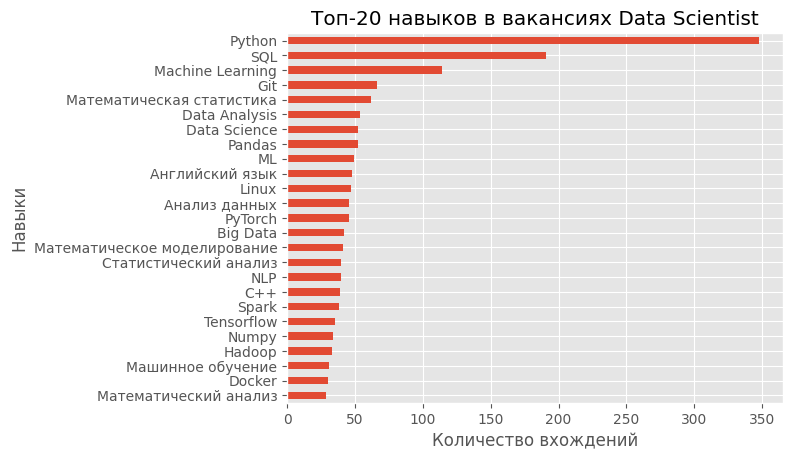

In [1360]:
# Анализ ключевых навыков в вакансиях Data Scientist

# Объединяем все значения key_skills в одну строку, разделяем по '\t' и фильтруем пустые значения
all_skills = key_skills_df['key_skills'].dropna().str.cat(sep='\t').split('\t')
all_skills = [skill.strip() for skill in all_skills if skill.strip()]

# Подсчитываем количество вхождений каждого навыка
skills_counter = Counter(all_skills)

# Преобразуем в DataFrame для удобства просмотра
skills_count_df = (
    pd.DataFrame(skills_counter.items(), columns=["skill", "count"])
    .sort_values(by="count", ascending=False)
    .reset_index(drop=True)
)

skills_count_df.head(20)  # Выводим топ-20 навыков

# Построение графика топ-25 навыков
plt.figure(figsize=(12, 10))
skills_count_df.head(25).plot(kind='barh', x='skill', y='count', legend=False)
plt.title('Топ-20 навыков в вакансиях Data Scientist')    
plt.xlabel('Количество вхождений')
plt.ylabel('Навыки')
plt.gca().invert_yaxis()  # Инвертируем ось Y для лучшего отображения
plt.show()

In [1361]:
# текст запроса вариант 2 с использованием SQL
query_6_5_sql = f"""
SELECT 
    ROUND(AVG(LENGTH(key_skills) - LENGTH(REPLACE(key_skills, CHR(9), '')) + 1), 2) AS avg_key_skills_count
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR  
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%')  OR
    LOWER(name) LIKE '%machine learning%' OR
    (LOWER(name) LIKE '%машинн%' AND LOWER(name) LIKE '%обучен%')
)
AND key_skills IS NOT NULL
"""
# Результат запроса
avg_key_skills_count_df = pd.read_sql_query(query_6_5_sql, connection)
avg_key_skills_count_df

D:\Temp\ipykernel_23264\1393156098.py:17: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  avg_key_skills_count_df = pd.read_sql_query(query_6_5_sql, connection)


,avg_key_skills_count
0,6.41


6. Напишите запрос, позволяющий вычислить, какую зарплату для DS в **среднем** указывают для каждого типа требуемого опыта (уникальное значение из поля *experience*). 

При решении задачи примите во внимание следующее:
1. Рассматриваем только вакансии, у которых заполнено хотя бы одно из двух полей с зарплатой.
2. Если заполнены оба поля с зарплатой, то считаем зарплату по каждой вакансии как сумму двух полей, делённую на 2. Если заполнено только одно из полей, то его и считаем зарплатой по вакансии.
3. Если в расчётах участвует null, в результате он тоже даст null (посмотрите, что возвращает запрос select 1 + null). Чтобы избежать этой ситуацию, мы воспользуемся функцией [coalesce](https://postgrespro.ru/docs/postgresql/9.5/functions-conditional#functions-coalesce-nvl-ifnull), которая заменит null на значение, которое мы передадим. Например, посмотрите, что возвращает запрос `select 1 + coalesce(null, 0)`

Выясните, на какую зарплату в среднем может рассчитывать дата-сайентист с опытом работы от 3 до 6 лет. Результат округлите до целого числа. 

In [1362]:
# текст запроса

query_6_6_1 = f"""
SELECT 
    experience,
    ROUND(AVG(
        CASE 
            WHEN salary_from IS NOT NULL AND salary_to IS NOT NULL THEN (salary_from + salary_to) / 2.0
            WHEN salary_from IS NOT NULL THEN salary_from
            WHEN salary_to IS NOT NULL THEN salary_to
        END
    )) AS avg_salary
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
    LOWER(name) LIKE '%machine learning%' OR
    (LOWER(name) LIKE '%машинн%' AND LOWER(name) LIKE '%обучен%')  
)
AND (salary_from IS NOT NULL OR salary_to IS NOT NULL)
GROUP BY experience
ORDER BY avg_salary DESC
"""

In [1363]:
# результат запроса
exp_count_df = pd.read_sql_query(query_6_6_1, connection)
exp_count_df

D:\Temp\ipykernel_23264\67075217.py:2: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  exp_count_df = pd.read_sql_query(query_6_6_1, connection)


,experience,avg_salary
0,От 3 до 6 лет,243115.0
1,От 1 года до 3 лет,139675.0
2,Нет опыта,74643.0


***

### *Bыводы по предметному анализу*

1. *По заданным параметрам поиска из общего пула вакансий специалистов для работы с данными насчитывается порядка 7,5 - 8%, а работающих в сфере DS ~2%*
2. *Из 480 вакансий DS специалистов в качестве ключевых навыков SQL & Postgre указан в 201 случае, а Python в 351. Дополнительно проведённый анализ ключевых навыков показал, что это наиболее популярные позиции. Также в процессе дополнительной обработки удалось выяснить, что для данной категории специалистов уровень заполняемости атрибута "key_skills" существенно выше чем в среднем "по больнице" и приближается к 100%*
3. *По данному датасету наблюдается явная положительная зависимость уровня зарплаты DS специалистов от опыта работы, но это желательно проверить на более объёмной выборке*

# Общий вывод по проекту

*К сожалению те задания, которые пришлось решать в ходе выполнения данного проекта не позволяют мне сделать какие-то общие выводы по этим данным...*

In [1365]:
# подведем итог исследования, обобщите выводы
# здесь можно (это будет плюсом) провести дополнительные исследования данных, сделать прогнозы, продумать варианты продолжения исследования

### *Дополниельные исследования*

In [1366]:
query_ds_vacancy = f"""
SELECT *
    
FROM vacancies
WHERE (
    LOWER(name) LIKE '%data scientist%' OR
    LOWER(name) LIKE '%data science%' OR
    LOWER(name) LIKE '%исследователь данных%' OR
    (name LIKE '%ML%' AND name NOT LIKE '%HTML%') OR
    LOWER(name) LIKE '%machine learning%' OR
    (LOWER(name) LIKE '%машинн%' AND LOWER(name) LIKE '%обучен%')
)
"""
ds_vacancies_df = pd.read_sql_query(query_ds_vacancy, connection)
ds_vacancies_df
# Сколько вакансий Data Scientist в крупных компаниях top50_employers_df
ds_vacancies_top50_df = ds_vacancies_df[ds_vacancies_df['employer_id'].isin(top50_employers_df['employer_id'])]
ds_vacancies_top50_count = ds_vacancies_top50_df.shape[0]
print(f"Количество вакансий Data Scientist в крупных компаниях (топ 50): {ds_vacancies_top50_count}")
# расчитать процент ds_vacancies_top50_count от ds_vacancies_count_df
ds_vacancies_top50_percentage = (ds_vacancies_top50_count / ds_vacancies_count_df.iloc[0, 0]) * 100
print(f"Процент вакансий Data Scientist в крупных компаниях (топ 50): {ds_vacancies_top50_percentage:.2f}%")

D:\Temp\ipykernel_23264\3823608848.py:14: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  ds_vacancies_df = pd.read_sql_query(query_ds_vacancy, connection)


Количество вакансий Data Scientist в крупных компаниях (топ 50): 187
Процент вакансий Data Scientist в крупных компаниях (топ 50): 38.96%


In [1367]:
# Скачиваем таблицу городов-миллионеров с указанной страницы Википедии
url_million_cities = (
    "https://ru.wikipedia.org/wiki/Список_городов_с_населением_более_миллиона_человек"
)
tables_million_cities = pd.read_html(requests.get(url_million_cities).text)

# Обычно первая таблица содержит нужные данные, но проверим структуру
# Выведем первые строки таблицы для ознакомления
million_cities_table = tables_million_cities[0]
# У далить "Фото[4]" и "Комментарии, ссылки"
million_cities_table = million_cities_table.drop(columns=["Фото[4]", "Комментарии, ссылки"])
# Столбец Население (год переписи)[3] разделить на два столбца: Население и Год переписи, где население, например 26 875 500 указано без скобок, год переписи - в скобках, цифры в [] ignore
million_cities_table[['Население', 'Год переписи']] = million_cities_table['Население (год переписи)[3]'].str.extract(r'(\d[\d\s]*)\s*\((\d{4})\)')


# Удалить столбец "Население (год переписи)[3]"
million_cities_table = million_cities_table.drop(columns=['Население (год переписи)[3]'])
million_cities_table.head()

D:\Temp\ipykernel_23264\4004335615.py:5: FutureWarning: Passing literal html to 'read_html' is deprecated and will be removed in a future version. To read from a literal string, wrap it in a 'StringIO' object.
  tables_million_cities = pd.read_html(requests.get(url_million_cities).text)


,№ п/п,Город,Страна,Население,Год переписи
0,1,Шанхай,Китай,26 875 500,2022
1,2,Пекин,Китай,21 843 000,2022
2,3,Дели,Индия,20 591 874,2021
3,4,Карачи,Пакистан,20 382 881,2023
4,5,Гуанчжоу,Китай,18 734 100,2022


In [1368]:
query_area = f"""
SELECT 
    id, 
    name
FROM areas
"""
million_area_df = pd.read_sql(query_area, connection)
# merge area_df with million_cities_table on name
million_area_df = million_area_df.merge(
    million_cities_table, left_on="name", right_on="Город", how="left"
)
# Удаление колонок № п/п, Город, Год переписи, фильтрация Город not null
million_area_df = million_area_df.drop(columns=["№ п/п", "Город", "Год переписи"])
million_area_df = million_area_df[million_area_df["Страна"].notnull()]
# Столбцы id и name в area_id и area_name соответственно
million_area_df.rename(columns={"id": "area_id", "name": "area_name"}, inplace=True)

# million_area_df

D:\Temp\ipykernel_23264\3203383166.py:7: UserWarning: pandas only supports SQLAlchemy connectable (engine/connection) or database string URI or sqlite3 DBAPI2 connection. Other DBAPI2 objects are not tested. Please consider using SQLAlchemy.
  million_area_df = pd.read_sql(query_area, connection)


In [1369]:
# merge ds_vacancies_df & million_area_df on area_id. Из million_area_df оставить только area_id, area_name, Население, Страна
ds_vacancies_million_df = ds_vacancies_df.merge(
    million_area_df[["area_id", "area_name", "Население", "Страна"]],
    on="area_id",
    how="left"
)
ds_vacancies_million_df.rename(columns={"Население": "population", "Страна": "country"}, inplace=True)
# Заменить NaN в столбцах area_name, country на 'Другое'
ds_vacancies_million_df['area_name'] = ds_vacancies_million_df['area_name'].fillna('Другое')
ds_vacancies_million_df['country'] = ds_vacancies_million_df['country'].fillna('Другое')
ds_vacancies_million_df
# выгрузить ds_vacancies_million_df в excel файл
# ds_vacancies_million_df.to_excel('ds_vacancies_million.xlsx', index=False)
# группировать по area_name и country, считать количество вакансий, удалить строку "Другое", посчитать общее количество вакансий в городах-миллионниках

ds_vacancies_million_df = ds_vacancies_million_df[ds_vacancies_million_df['area_name'] != 'Другое']
# Группируем по area_name и country, считаем количество вакансий
million_cities_grouped = ds_vacancies_million_df.groupby(['area_name', 'country']).size().reset_index(name='vacancies_count')
# подчитать общее количество вакансий в городах-миллионниках и добавить в отдельную строку в million_cities_grouped
total_vacancies_count = million_cities_grouped['vacancies_count'].sum()
total_row = pd.DataFrame({'area_name': ['Total'], 'country': ['All'], 'vacancies_count': [total_vacancies_count]})
million_cities_grouped = pd.concat([million_cities_grouped, total_row], ignore_index=True)
# сортировать по количеству 1. вакансий в порядке убывания 2. по названию города в алфавитном порядке
million_cities_grouped = million_cities_grouped.sort_values(by=['vacancies_count', 'area_name'], ascending=[False, True])
# Выводим результат не показывать индекс
million_cities_grouped.reset_index(drop=True, inplace=True)
print(million_cities_grouped)


          area_name      country  vacancies_count
0             Total          All              398
1            Москва       Россия              217
2   Санкт-Петербург       Россия               64
3       Новосибирск       Россия               23
4   Нижний Новгород       Россия               20
5            Казань       Россия               16
6             Минск     Беларусь                9
7      Екатеринбург       Россия                7
8         Краснодар       Россия                6
9    Ростов-на-Дону       Россия                6
10            Пермь       Россия                5
11           Самара       Россия                5
12          Ташкент   Узбекистан                4
13             Омск       Россия                3
14          Тбилиси       Грузия                3
15             Баку  Азербайджан                2
16          Воронеж       Россия                2
17              Уфа       Россия                2
18           Бишкек   Кыргызстан                1


#### *Выводы*

1. *Был проведён анализ появления вакансии DS специалиста в списках ТОП50 компаний по количеству опубликованных вакансий. Как оказалось из 480 вакансий DS, 187 или почти 40% оказалось в списках крупных работодателей, что говорит о востребованности данной специализации у крупного бизнеса.*
2. *Ещё более наглядная картина по распределению вакансий DS в разрезе городов с населением более 1 000 000 человек. Подавляющее большинство, более 80% из общего количества приходится на эти города, а почти половина от всех вакансий DS находится в Москве, где сосредоточено большинство штаб-квартир крупных компаний и компаний специализирующихся в IT разработках.*

In [1370]:
# Закрываем соединение с базой данных
connection.close()